# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

### Energiebalans
De toegevoerde elektrische energie wordt berekend met de formule:
$$E_{el} = P \cdot t$$
Waarbij:
* $P$ = het elektrisch vermogen in Watt ($J/s$).
* $t$ = de tijd in seconden ($s$).

De warmte die door het water wordt opgenomen om in temperatuur te stijgen, wordt gegeven door:
$$Q = m \cdot c \cdot \Delta T$$
Waarbij:
* $m$ = de massa van het water in kilogram ($kg$).
* $c$ = de soortelijke warmte van water in $J/(kg \cdot K)$.
* $\Delta T$ = de verandering in temperatuur in $^\circ C$ of $K$.



Door $E_{el} = Q$ te stellen, verkrijgen we de centrale vergelijking voor dit experiment:
$$P \cdot t = m \cdot c \cdot (T_t - T_0)$$

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.

    1. Meet met een maatbeker exact 300 ml kraanwater af. 
    2. Gebruik een weegschaal om de exacte massa van het water te controleren. 
    3. Plaats het verwarmingselement en de temperatuursensor in het water. Zorg dat de weerstand het glas van de beker volledig ondergedompeld is.
    4. Zet de roerder aan om een gelijkmatige temperatuurverdeling te garanderen. 
    5. Meet de begin temperatuur van het water in de maatbeker en noteer deze. 
    6. Zet de spanningsbron aan en stel deze in op een vermogen van 20 Watt. Start dan ook meteen de stopwatch. 
    7. Noteer elke 15 seconden de temperatuur op het scherm van de sensor/thermometer. Doe dit gedurende minimaal 5 tot 10 minuten.
    8. Zodra je klaar bent met meten, zet dan de apparatuur uit en leeg de maatbeker. 

2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```



## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.


Voor een nauwkeurige bepaling van $c$ maken we gebruik van curve fitting, hierdoor kunnen we een rechte lijn fitten door al onze verzamelde datapunten. 

We schrijven de theoretische formule om naar een vorm die lijkt op een rechte lijn ($y = ax + b$):
   $$T_t = \left( \frac{P}{m \cdot c} \right) \cdot t + T_0$$
   Hierbij is de temperatuur $T_t$ de afhankelijke variabele ($y$) en de tijd $t$ de onafhankelijke variabele ($x$).

De helling van de resulterende curvefit staat gelijk aan:
   $$\text{helling} = \frac{P}{m \cdot c}$$

De soortelijke warmte $c$ wordt uiteindelijk berekend door de formule om te schrijven:
   $$c = \frac{P}{m \cdot \text{helling}}$$

# Resultaten


Berekende soortelijke warmte: 4795.18 J/(kg·K)


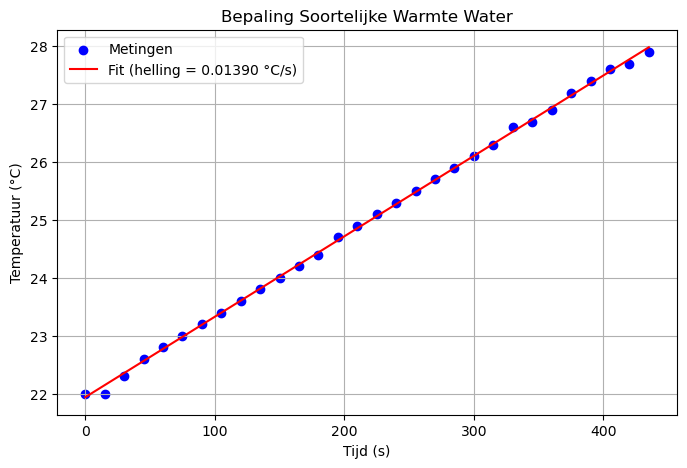

In [ ]:
# Data + analyse (c_water)

# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Metingen (°C)
T_meas_0 = np.array([
    22.0, 22.0, 22.3, 22.6, 22.8, 23.0, 23.2, 23.4, 23.6, 23.8,
    24.0, 24.2, 24.4, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9,
    26.1, 26.3, 26.6, 26.7, 26.9, 27.2, 27.4, 27.6, 27.7, 27.9
])

# Stab-test: kleine meetruis (pas SIGMA_T / SEED aan)
SEED = 0
SIGMA_T = 0.08  # °C
rng = np.random.default_rng(SEED)
T_meas = np.round(T_meas_0 + rng.normal(0.0, SIGMA_T, size=T_meas_0.shape), 1)

# Consts (zelfde volgorde)
M_WATER = 0.300  # kg (300 ml)
P_HEATER = 20    # W
DT = 15          # s

# Tijd-as
t_s = np.arange(len(T_meas)) * DT

# Curve fit (lineair): T(t) = a*t + T0
def T_lin(t, a, T0):
    return a * t + T0

popt, _ = curve_fit(T_lin, t_s, T_meas)
a, T0 = popt

# c = P / (m * dT/dt)
C_WATER = P_HEATER / (M_WATER * a)

# Output
print(f"Fit helling a = {a:.6f} °C/s")
print(f"Berekende soortelijke warmte: {C_WATER:.2f} J/(kg·K)")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(t_s, T_meas, label='Metingen', color='blue')
plt.plot(t_s, T_lin(t_s, *popt), color='red',
         label=f'Fit (helling = {a:.5f} °C/s)')

plt.xlabel('Tijd (s)')
plt.ylabel('Temperatuur (°C)')
plt.title('Bepaling Soortelijke Warmte Water')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Save fig (optional)
# plt.savefig("figures/naam.png", dpi=450)


# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.

Uit de resultaten blijkt dat er inderdaad een lineaire verband is tussen de tijd en de temperatuur van het water. De warmteoverdrachtscoefficient is berekent als 4795.18 J/(kg·K). Dit komt sterk overeen met de theoretische waarde die gelijk is aan 4795 J/(kg·K). In een vervolgonderzoek kan er gekeken worden naar de resultaten als de temperatuur van de weerstand de temperatuur van het water nadert. Volgt de fit dan nog steeds een lineaire lijn? Of kromt deze naar beneden af? 